<a href="https://colab.research.google.com/github/jinsumin81/BD-team/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
!apt-get -qq -y install fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
import numpy as np
import os


font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [70]:
ttn= pd.read_csv('titanic1309.csv')

In [71]:
ttn.info

<bound method DataFrame.info of       PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked  
0         0           A/5 21171    7.2500   NaN        S  
1         0            PC 17599   71.2833   C85        C  
2         0    STON/O2. 3101282    7.9250   NaN        S  
3         0              113803   53.1000  C123        S  
4         0              373450    8.0500   NaN        S  
...     ...                 ...       ...   ...      ...  
1304      0           A.5. 3236    8.0500   NaN        S  
1305      0            PC 17758  108.9000  C105        C  
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
1307      0              359309    8.0500   NaN        S  
1308      1                2668   22.3583   NaN        C  

[1309 rows x 12 columns]>

# 탑승객 분석

### 성별 - 좌석 등급

In [72]:
ttn['Sex'].value_counts() # 성별

,count
Sex,
male,843
female,466


In [73]:
ttn['Pclass'].value_counts().sort_index() # 좌석 등급

,count
Pclass,
1,323
2,277
3,709


In [74]:
ttn.groupby(['Sex', 'Pclass']).size().unstack() # 성별별로 좌석 등급

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


<Axes: xlabel='Sex', ylabel='count'>

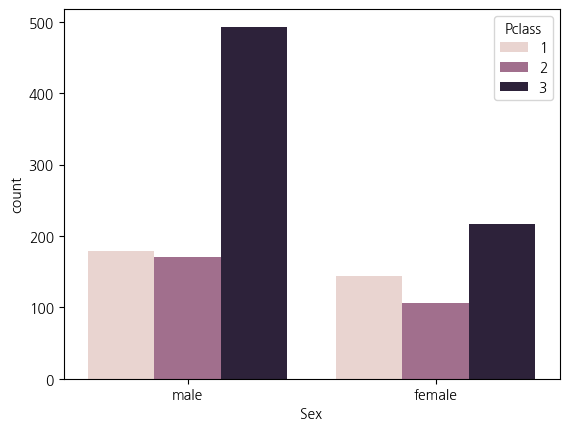

In [75]:
sns.countplot(ttn,x='Sex',hue='Pclass') # 그래프로 표현

### 성별 - 나이

In [76]:
ttn['Age'].isnull().sum() # 나이 열의 결측치 수

np.int64(263)

In [77]:
ttn_Age = ttn.dropna(subset=['Age']).copy() # 나이 열의 결측치 제거

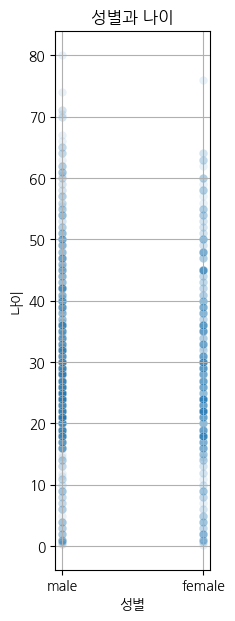

In [78]:
# scatter그래프로 표현
plt.figure(figsize=(2, 7))
sns.scatterplot(x='Sex', y='Age', data=ttn_Age, alpha=0.1)

plt.title('성별과 나이')
plt.xlabel('성별')
plt.ylabel('나이')
plt.grid(True)
plt.show()

### 나이대별로 분석



In [79]:
# 나이대 나누기

# 새로운 열 생성
ttn_Age['AgeGroup'] = ''

# iloc 사용해 직접 나이대 지정
agegroup_col_index = ttn_Age.columns.get_loc('AgeGroup')  # 'AgeGroup' 열의 위치 인덱스

for i in range(len(ttn_Age)):
    age = ttn_Age.iloc[i]['Age']
    if age <= 10:
        ttn_Age.iloc[i, agegroup_col_index] = '0-10'
    elif age <= 20:
        ttn_Age.iloc[i, agegroup_col_index] = '11-20'
    elif age <= 30:
        ttn_Age.iloc[i, agegroup_col_index] = '21-30'
    elif age <= 40:
        ttn_Age.iloc[i, agegroup_col_index] = '31-40'
    elif age <= 50:
        ttn_Age.iloc[i, agegroup_col_index] = '41-50'
    elif age <= 60:
        ttn_Age.iloc[i, agegroup_col_index] = '51-60'
    elif age <= 70:
        ttn_Age.iloc[i, agegroup_col_index] = '61-70'
    else:
        ttn_Age.iloc[i, agegroup_col_index] = '71-80'

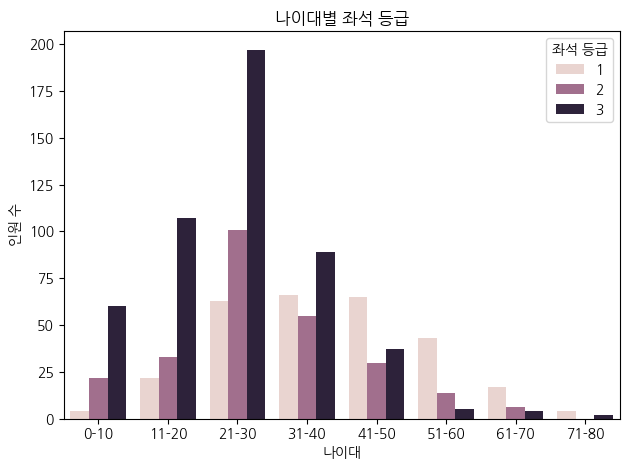

In [80]:
# 그래프로 나타내기
labels = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']

sns.countplot(x='AgeGroup', hue='Pclass', data=ttn_Age, order=labels)
plt.title('나이대별 좌석 등급')
plt.xlabel('나이대')
plt.ylabel('인원 수')
plt.legend(title='좌석 등급')
plt.tight_layout()
plt.show()

* 전체 탑승자 중 남성의 비율이 여성보다 현저히 높았으며, 이는 타이타닉 승객 구성에서 **남성이 다수를 차지했음을 보여준다.**
* 1등석과 2등석에서는 남성과 여성의 탑승자 비율이 비교적 균형을 이루었으나,
 **3등석에서는 남성 탑승자가 여성보다 압도적으로 많았다.**
* 나이대별로는 20대 승객이 가장 많았으며, **특히 20대 남성의 비중이 가장 높은 연령-성별 조합으로 나타났다.**
* 이에 예상할 수 있듯 20대 연령대에서 3등석을 제일 많이 앉았다

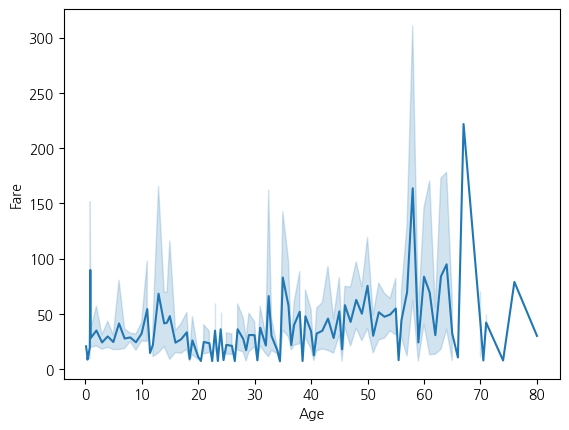

In [81]:
# 나이에 따른 운임 비용 그래프
sns.lineplot(ttn_Age, x='Age', y = 'Fare');

# 사망자 수 분석

<Axes: xlabel='Survived', ylabel='count'>

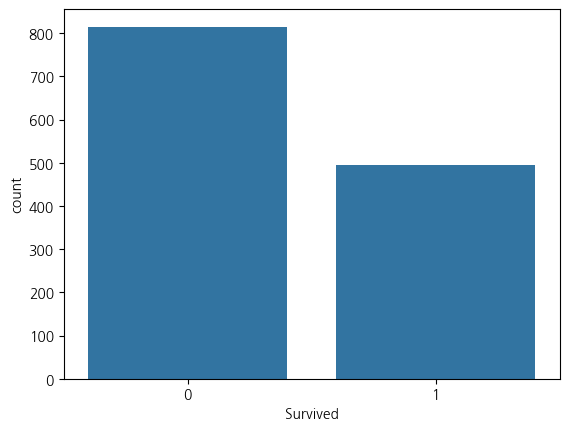

In [82]:
# 사망자수와 생존자수
sns.countplot(ttn, x='Survived')

In [83]:
# 성별별 사망자 수
ttn[ttn['Survived'] == 0].groupby('Sex')['Survived'].count()

,Survived
Sex,
female,81
male,734


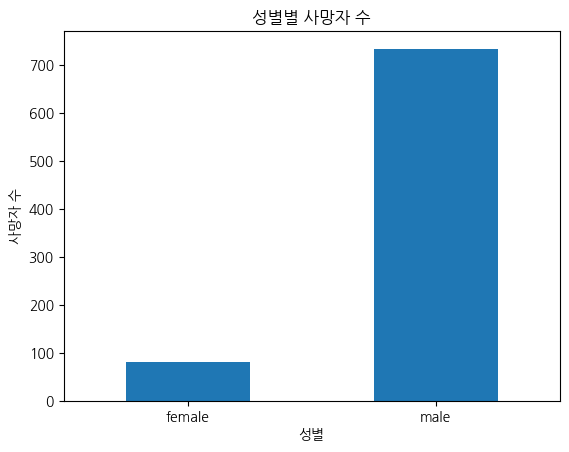

In [84]:
# 사망자만 필터링
dead = ttn[ttn['Survived'] == 0]

# 성별별 사망자 수
dead_by_sex = dead.groupby('Sex').size()

# 그래프
dead_by_sex.plot(kind='bar')
plt.title('성별별 사망자 수')
plt.xlabel('성별')
plt.ylabel('사망자 수')
plt.xticks(rotation=0)
plt.show()

In [85]:
# 좌석 등급별 생존자 수
grouped = ttn.groupby(['Pclass', 'Survived']).size().unstack()
grouped

Survived,0,1
Pclass,,
1,137,186
2,160,117
3,518,191


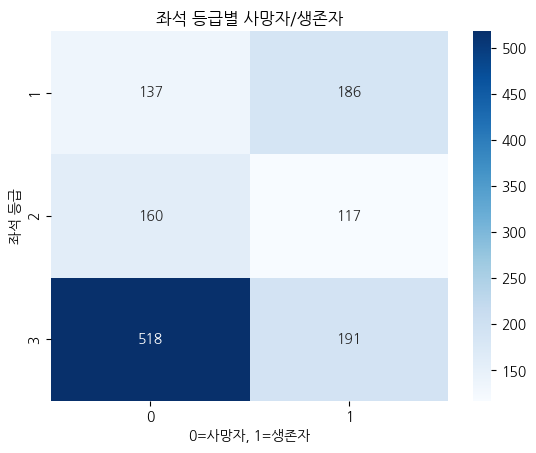

In [86]:
# heatmap 그래프로 표현
sns.heatmap(grouped, annot=True, cmap='Blues',fmt=".0f")
plt.title('좌석 등급별 사망자/생존자')
plt.xlabel('0=사망자, 1=생존자')
plt.ylabel('좌석 등급')
plt.show()

In [87]:
# 항구 열 결측치 확인
ttn['Embarked'].isnull().sum()

np.int64(2)

In [88]:
# 결측치 제거
ttn_Embarked = ttn.dropna(subset=['Embarked']).copy()

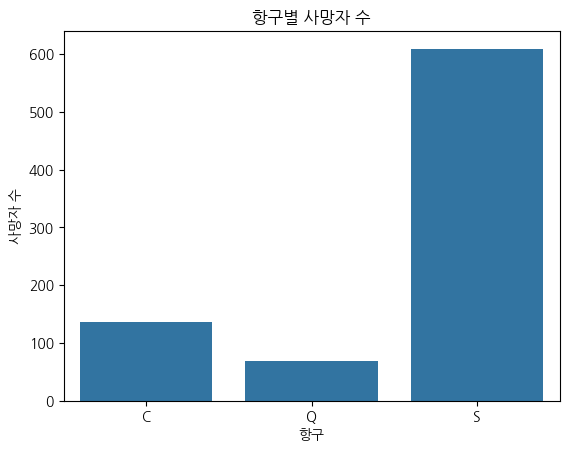

In [89]:
# 항구별 사망자 수 그래프

#사망자 필터링
dead = ttn_Embarked[ttn_Embarked['Survived'] == 0]

#항구별 사망자 수 카운트
dead_Embarked = dead.groupby('Embarked').size().reset_index(name='count')

#그래프 그리기
sns.barplot(data=dead_Embarked, x='Embarked', y='count')

plt.title('항구별 사망자 수')
plt.xlabel('항구')
plt.ylabel('사망자 수')
plt.xticks(rotation=0)
plt.show()

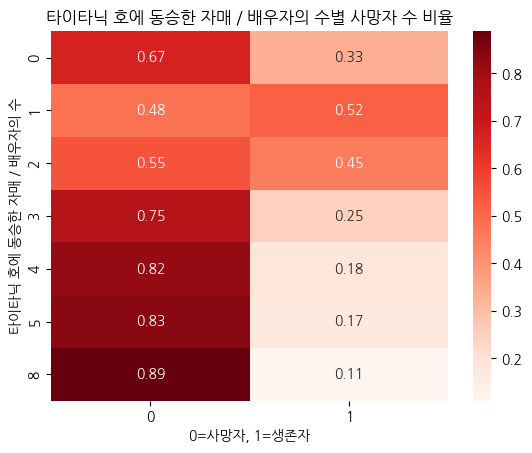

In [90]:
# 타이타닉 호에 동승한 자매 / 배우자의 수별 사망자 수 비율

# SibSp와 Survived로 그룹화 후
sibsp_group = ttn.groupby(['SibSp', 'Survived']).size()

# 비율 계산 (SibSp별 총합으로 나눔)
sibsp_ratio = sibsp_group / sibsp_group.groupby(level=0).sum()
sibsp_ratio_df = sibsp_ratio.unstack()

# 히트맵으로 시각화
sns.heatmap(sibsp_ratio_df, annot=True, cmap='Reds', fmt=".2f")
plt.title('타이타닉 호에 동승한 자매 / 배우자의 수별 사망자 수 비율')
plt.xlabel('0=사망자, 1=생존자')
plt.ylabel('타이타닉 호에 동승한 자매 / 배우자의 수')
plt.show()

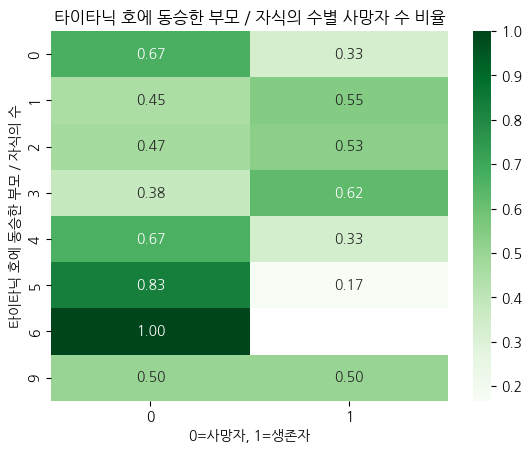

In [91]:
# 타이타닉 호에 동승한 부모 / 자식의 수별 사망자 수 비율

# Parch와 Survived로 그룹화
parch_group = ttn.groupby(['Parch', 'Survived']).size()

# 비율 계산 (Prach별 총합으로 나눔)
parch_ratio = parch_group / parch_group.groupby(level=0).sum()
parch_ratio_df = parch_ratio.unstack()

# 히트맵 시각화
sns.heatmap(parch_ratio_df, annot=True, cmap='Greens', fmt=".2f")
plt.title('타이타닉 호에 동승한 부모 / 자식의 수별 사망자 수 비율')
plt.xlabel('0=사망자, 1=생존자')
plt.ylabel('타이타닉 호에 동승한 부모 / 자식의 수')
plt.show()

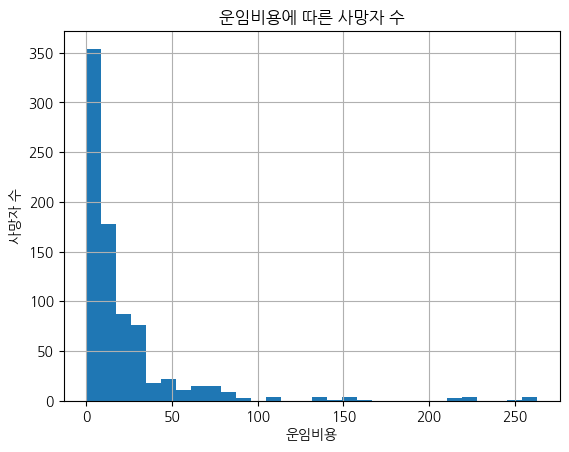

In [92]:
# 운임비용에 따른 사망자 수

# 히스토그램으로 시각화
dead['Fare'].plot(kind='hist', bins=30)
plt.title('운임비용에 따른 사망자 수')
plt.xlabel('운임비용')
plt.ylabel('사망자 수')
plt.grid(True)
plt.show()